# Introduction to Zarr and ome-zarr

Zarr is a format for the storage of chunked, compressed, N-dimensional arrays.
Arrays can be organised into hierarchical groups with associated metadata. We are working on [OME-zarr](https://ngff.openmicroscopy.org/), a specification for how to represent Images, HCS Plates, ROIs and other data in Zarr format


# Zarr

## Arrays

Zarr arrays are stored as a directory that contains binary 'chunks' of data and a JSON file `.zarray` that specifies the chunks metadata. For example: 

```
# .zarray
{
    "chunks": [
        1,
        1,
        1,
        256,
        336
    ],
    "compressor": {
        "blocksize": 0,
        "clevel": 5,
        "cname": "lz4",
        "id": "blosc",
        "shuffle": 1
    },
    "dtype": "<i8",
    "fill_value": 0,
    "filters": null,
    "order": "C",
    "shape": [
        1,
        1,
        1,
        1024,
        1344
    ],
    "zarr_format": 2
}
```
Chunks are named according to their index in the N-dimensional array. For example, in the 5D array above, chunks would be named:

```
# chunks of 5D array
0.0.0.0.0
0.0.0.0.1
0.0.0.0.3
0.0.0.0.4
0.0.0.1.0
0.0.0.1.1
...
```

## Groups

Zarr groups are directories that contain arrays or other groups, and a JSON file `.attrs` that contains data about the group and it's contents.


# OME zarr

## Images

In OME zarr, Images are represented by a group with `multiscales` metadata. It may also contain `omero` metadata if available. The `multiscales` section will list 1 or more multiscale `datasets`, with a `path` to each zarr 5D `array` at different resolutions. Array dimensions are Time, Channel, Z, Y, X (`t.c.z.y.x`).

```
# image.zarr/.zattrs
{
    "multiscales": [
        {
            "datasets": [
                {
                    "path": "0"             # Path to Array containing full-size Image
                },
                {
                    "path": "1"             # Path to Array containing sub-resolution Image
                },
                {
                    "path": "2"             # Path to Array containing sub-resolution Image
                }
            ],
            "version": "0.1"
        }
    ],
    "omero": {
        "channels": [
            {
                "active": true,
                "coefficient": 1.0,
                "color": "FF0000",
                "family": "linear",
                "inverted": false,
                "label": "Red",
                "window": {
                    "end": 1500.0,
                    "max": 65535.0,
                    "min": 0.0,
                    "start": 0.0
                }
            }
        ],
        "id": 1,
        "rdefs": {
            "defaultT": 0,
            "defaultZ": 0,
            "model": "color"
        }
    }
}
```

Each Image array is found under the specified `path`, e.g. for `"path": "0"`:

```
# image.zarr/0/
.zarray
0.0.0.0.0
0.0.0.0.1
0.0.0.1.0
0.0.0.1.1
...
```

## Loading sample OME zarr Images

A list of example Images (from the IDR), converted to `OME zarr` and hosted at https://s3.embassy.ebi.ac.uk is available at (blog.openmicroscopy.org)[https://blog.openmicroscopy.org/file-formats/community/2020/11/04/zarr-data/]. You can 'copy' links to Images from the table.


In [ ]:
import dask.array as da
from IPython.display import display, Image
from matplotlib import pyplot as plt
import requests
import zarr

In [2]:
imagepath = "https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/9822152.zarr"

In [3]:
# Load the top-level .zattrs Image metadata
zattrs = requests.get(f'{imagepath}/.zattrs').json()
# Get the path for each resolution of the first multiscale dataset  
resolutions = [d['path'] for d in zattrs['multiscales'][0]['datasets']]

darrays = {}
for resolution in resolutions:
    print(f'Resolution: "{resolution}"')
    # Create a 'dask' array (like numpy array but with lazy loading of data)
    a = da.from_zarr(f'{imagepath}/{resolution}')
    darrays[resolution] = a
    display(a)

Resolution: "0"


,Array,Chunk
Bytes,26.91 GB,2.10 MB
Shape,"(1, 1, 1, 93184, 144384)","(1, 1, 1, 1024, 1024)"
Count,12832 Tasks,12831 Chunks
Type,>u2,numpy.ndarray


Resolution: "1"


,Array,Chunk
Bytes,6.73 GB,2.10 MB
Shape,"(1, 1, 1, 46592, 72192)","(1, 1, 1, 1024, 1024)"
Count,3267 Tasks,3266 Chunks
Type,>u2,numpy.ndarray


Resolution: "2"


,Array,Chunk
Bytes,1.68 GB,2.10 MB
Shape,"(1, 1, 1, 23296, 36096)","(1, 1, 1, 1024, 1024)"
Count,829 Tasks,828 Chunks
Type,>u2,numpy.ndarray


Resolution: "3"


,Array,Chunk
Bytes,420.45 MB,2.10 MB
Shape,"(1, 1, 1, 11648, 18048)","(1, 1, 1, 1024, 1024)"
Count,217 Tasks,216 Chunks
Type,>u2,numpy.ndarray


Resolution: "4"


dask.array<from-zarr, shape=(1, 1, 1, 5824, 9024), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "5"


dask.array<from-zarr, shape=(1, 1, 1, 2912, 4512), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "6"


dask.array<from-zarr, shape=(1, 1, 1, 1456, 2256), dtype=>u2, chunksize=(1, 1, 1, 1024, 1024), chunktype=numpy.ndarray>

Resolution: "7"


dask.array<from-zarr, shape=(1, 1, 1, 728, 1128), dtype=>u2, chunksize=(1, 1, 1, 728, 1024), chunktype=numpy.ndarray>

Resolution: "8"


dask.array<from-zarr, shape=(1, 1, 1, 364, 564), dtype=>u2, chunksize=(1, 1, 1, 364, 564), chunktype=numpy.ndarray>

Resolution: "9"


dask.array<from-zarr, shape=(1, 1, 1, 182, 282), dtype=>u2, chunksize=(1, 1, 1, 182, 282), chunktype=numpy.ndarray>

Resolution: "10"


dask.array<from-zarr, shape=(1, 1, 1, 91, 141), dtype=>u2, chunksize=(1, 1, 1, 91, 141), chunktype=numpy.ndarray>

Display the smallest resolution image. In this image `T`, `C`, `Z` are all singleton dimensions

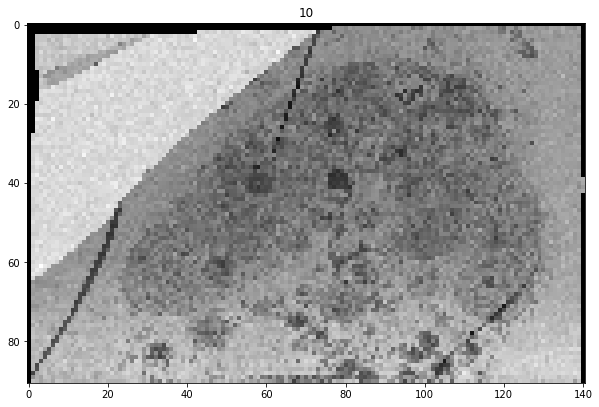

In [5]:
r = resolutions[-1]
a0 = darrays[r][0, 0, 0, :, :]
print(r, a0.shape)
plt.figure(figsize=(10, 10))
plt.imshow(a0, cmap='gray')
plt.title(r)

As you can see it very low resolution, so let's look at the 3rd smallest resolution instead.

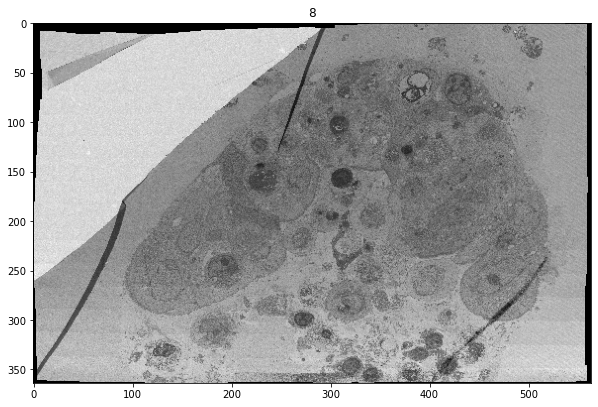

In [6]:
r = resolutions[-3]
a0 = darrays[r][0, 0, 0, :, :]
print(r, a0.shape)
plt.figure(figsize=(10, 10))
plt.imshow(a0, cmap='gray')
plt.title(r)

Now "zoom in" to the centre of image by showing the same number of pixels but at the next resolution up

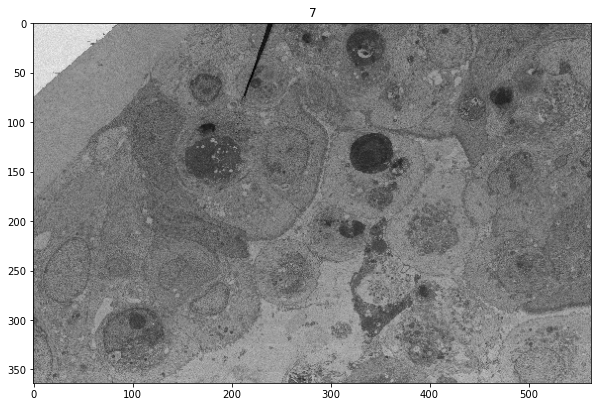

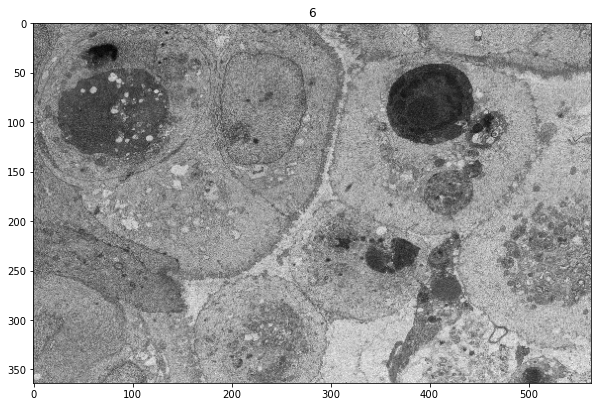

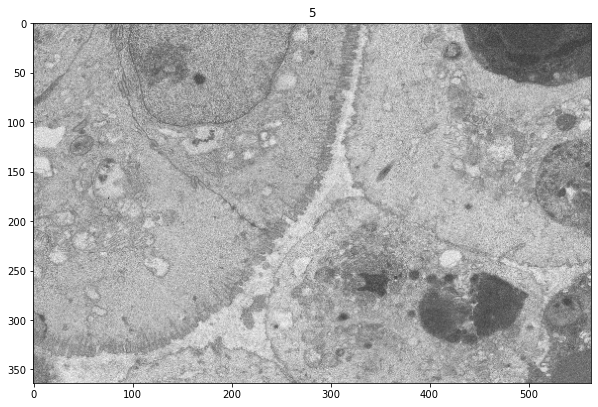

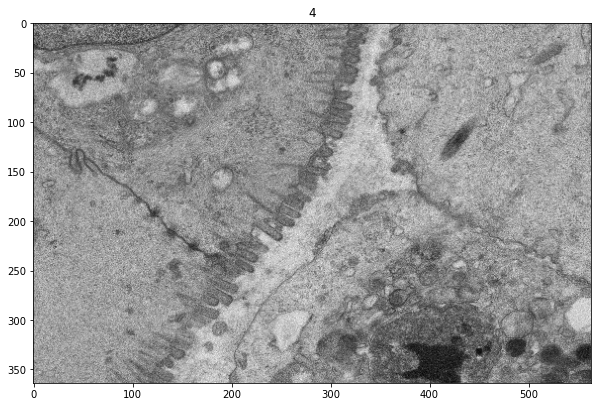

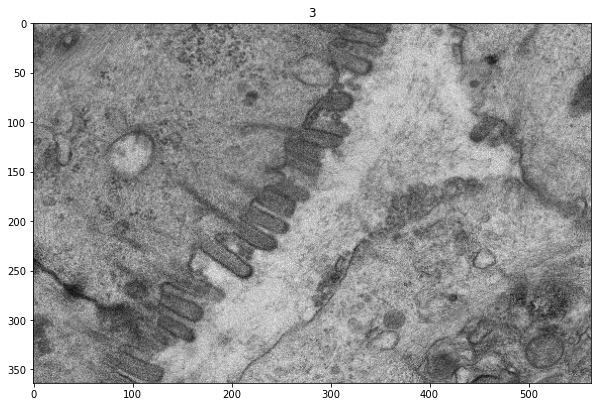

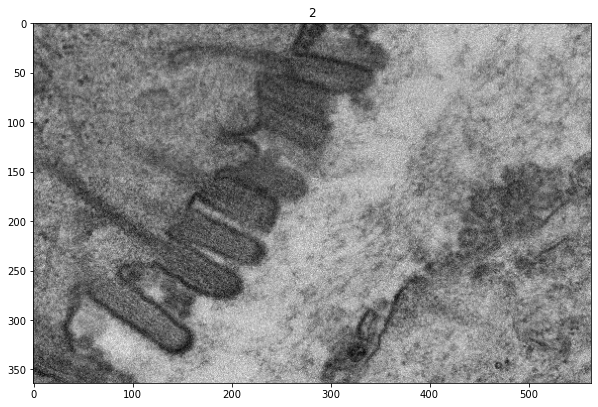

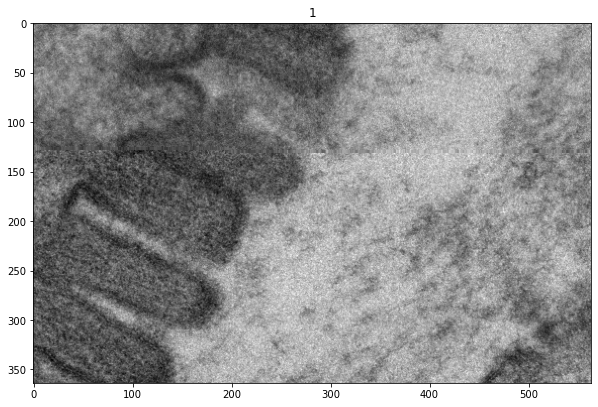

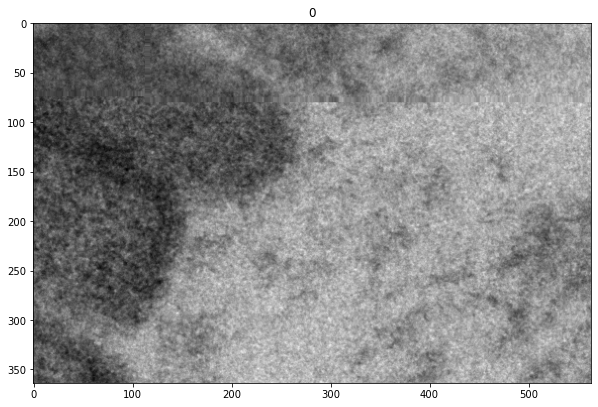

In [7]:
dy = int(a0.shape[0] / 2)
dx = int(a0.shape[1] / 2)

for r in reversed(resolutions[:-3]):
    a = darrays[r][0, 0, 0, :, :]
    # Change the following line to zoom into a different location
    cy, cx = int(a.shape[0] / 2), int(a.shape[1] / 2)
    print(f'resolution: {r}, cy: {cy}, cx: {cx}')
    # Crop the dask array - still doesn't load remote data yet
    region = a[cy-dy:cy+dy, cx-dx:cx+dx]
    plt.figure(figsize=(10, 10))
    # Show the image - loading remote data
    plt.imshow(region, cmap='gray')
    plt.title(r)
    plt.show()

## Labels

Labels (or Masks) are pixel-based Regions of Interest, such as image segmentations. In OME zarr, labels are stored in a `labels` directory within the image.zarr directory. Labels are 5D zarr arrays corresponding to the size of the parent image, with background values of `0` and each label represented by a different pixel value.

Multiple `arrays` of labels can be stored under the labels group, as defined in the `labels/.zattrs` JSON:

```
# image.zarr/labels/.zattrs

{
    "labels": [
        "0"
    ]
}
```

This indicates a labels array at `image.zarr/labels/0/`.




In [ ]:


imagepath = 'https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/6001247.zarr'
zattrs = requests.get(f'{imagepath}/labels/.zattrs').json()
print('zattrs', zattrs)


label_path = zattrs['labels'][0]
labels_5d = da.from_zarr(f'{imagepath}/labels/{label_path}/')
print(l, labels_5d.shape)
size_z = labels_5d.shape[2]
labels_2d = labels_5d[0, 0, size_z // 2, :, :]
print('labels_2d', labels_2d.shape)
plt.figure(figsize=(10, 10))
# Show the image - loading remote data
plt.imshow(labels_2d, cmap='gray')
plt.title(l)
plt.show()

### License
Copyright (C) 2020 University of Dundee. All Rights Reserved.
This program is free software; you can redistribute it and/or modify it
under the terms of the GNU General Public License as published by the
Free Software Foundation; either version 2 of the License, or
(at your option) any later version.
This program is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY
or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for
more details. You should have received a copy of the GNU General
Public License along with this program; if not, write to the
Free Software Foundation,
Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA.